# Problem Statement

John is HR Analytics Manager at STA IT services.
STA hires hundreds of IT Executive and manager for consulting Buisness. John's team invest a large amount of time and effort to analyze each and every resume to calculate the joing CTC/salary for new hires.

### Task -
*Create a Linear Regression model to predict the CTC/Salary of new hires from the Data Provided.*

## *Overview*:-
Linear regression performs a regression task on a target variable based on independent variables in a given data. It is a machine learning algorithm and is often used to find the relationship between the target and independent variables.

The __Simple Linear Regression model__ is to predict the target variable using one independent variable.

When one variable/column in a dataset is not sufficient to create a good model and make more accurate predictions, we’ll use a multiple linear regression model instead of a simple linear regression model

The line equation for the multiple linear regression model is:
```y = β0 + β1X1 + β2X2 + β3X3 + ....+ βpXp + e```

Before proceeding further on
building the model using python,
we need to consider some things:
1. Adding more variables isn’t
always helpful because the
model may ‘over-fit,’ and it’ll be
too complicated. The trained
model doesn’t generalize with
the new data. It only works on
the trained data.
2. All the variables/columns in the
dataset may not be independent.
This condition is called
multicollinearity , where there
is an association between
predictor variables.
3. We have to select the
appropriate variables to build
the best model. This process of
selecting variables is called
Feature selection 

## *Reading and Understanding the dataset*

We read the data into our system
and understand if the data has any
anomalies
The target variable/column in the
dataset is `CTC`

###### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Data.csv')
data

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...,...
1333,1334,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,1335,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,1336,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,1337,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [3]:
data.reindex(data['S.No.'])

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,,
1,2.0,Tier 2,Executive,Metro,"57,081.00",1.0,84.0,18.0,"68,005.87"
2,3.0,Tier 2,Executive,Metro,"60,347.00",2.0,52.0,28.0,"76,764.02"
3,4.0,Tier 3,Executive,Metro,"49,010.00",2.0,81.0,33.0,"82,092.39"
4,5.0,Tier 3,Executive,Metro,"57,879.00",4.0,74.0,32.0,"73,878.10"
5,6.0,Tier 2,Executive,Non-Metro,"54,340.00",4.0,73.0,31.0,"59,950.89"
...,...,...,...,...,...,...,...,...,...
1334,1335.0,Tier 1,Executive,Non-Metro,"53,714.00",1.0,67.0,18.0,"69,298.75"
1335,1336.0,Tier 2,Executive,Non-Metro,"61,957.00",1.0,47.0,18.0,"66,397.77"
1336,1337.0,Tier 1,Executive,Non-Metro,"53,203.00",3.0,69.0,21.0,"64,044.38"


In [4]:
data = data.drop('S.No.',axis=1)
data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [5]:
data['Previous CTC'] = [float(str(i).replace(",", "")) for i in data['Previous CTC']]
data['Previous job changes'] = [float(str(i).replace(",", "")) for i in data['Previous job changes']]
data['Graduation marks'] = [float(str(i).replace(",", "")) for i in data['Graduation marks']]
data['Exp (Months)'] =[float(str(i).replace(",", "")) for i in data['Exp (Months)'] ]
data['CTC'] = [float(str(i).replace(",", "")) for i in data['CTC']]
data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3.0,66.0,19.0,71406.58
1,Tier 2,Executive,Metro,57081.0,1.0,84.0,18.0,68005.87
2,Tier 2,Executive,Metro,60347.0,2.0,52.0,28.0,76764.02
3,Tier 3,Executive,Metro,49010.0,2.0,81.0,33.0,82092.39
4,Tier 3,Executive,Metro,57879.0,4.0,74.0,32.0,73878.10
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4.0,68.0,50.0,69712.40
1334,Tier 1,Executive,Non-Metro,53714.0,1.0,67.0,18.0,69298.75
1335,Tier 2,Executive,Non-Metro,61957.0,1.0,47.0,18.0,66397.77
1336,Tier 1,Executive,Non-Metro,53203.0,3.0,69.0,21.0,64044.38


In [6]:
data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   float64
 4   Previous job changes  1338 non-null   float64
 5   Graduation marks      1338 non-null   float64
 6   Exp (Months)          1338 non-null   float64
 7   CTC                   1338 non-null   float64
dtypes: float64(5), object(3)
memory usage: 83.8+ KB


##### Missing Values

In [8]:
data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

### Data Preparation and Cleaning

###### Changing Cateogorial Variable into numerical variable

In [9]:
data.College.value_counts()

Tier 1    649
Tier 2    364
Tier 3    325
Name: College, dtype: int64

In [10]:
data.Role.value_counts()

Executive    1064
Manager       274
Name: Role, dtype: int64

In [11]:
data['City type'].value_counts()

Metro        676
Non-Metro    662
Name: City type, dtype: int64

To convert categorial data into
numerical data we use dummy variable
When you have a categorical
variable with n-levels , the idea of
creating a dummy variable is to build ‘n-1’ variables , indicating
the levels.
We can create a dummy variable
using the `get_dummies` method in
pandas.

In [12]:
college_type = pd.get_dummies(data['College'],drop_first=True)
role_type = pd.get_dummies(data['Role'],drop_first=True)
city_type = pd.get_dummies(data['City type'],drop_first=True)

data = pd.concat([data,college_type,role_type,city_type],axis=1)

data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 2,Tier 3,Manager,Non-Metro
0,Tier 1,Manager,Non-Metro,55523.0,3.0,66.0,19.0,71406.58,0,0,1,1
1,Tier 2,Executive,Metro,57081.0,1.0,84.0,18.0,68005.87,1,0,0,0
2,Tier 2,Executive,Metro,60347.0,2.0,52.0,28.0,76764.02,1,0,0,0
3,Tier 3,Executive,Metro,49010.0,2.0,81.0,33.0,82092.39,0,1,0,0
4,Tier 3,Executive,Metro,57879.0,4.0,74.0,32.0,73878.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4.0,68.0,50.0,69712.40,0,1,0,0
1334,Tier 1,Executive,Non-Metro,53714.0,1.0,67.0,18.0,69298.75,0,0,0,1
1335,Tier 2,Executive,Non-Metro,61957.0,1.0,47.0,18.0,66397.77,1,0,0,1
1336,Tier 1,Executive,Non-Metro,53203.0,3.0,69.0,21.0,64044.38,0,0,0,1


In [13]:
data.drop(['College','Role','City type'],axis=1,inplace=True)
data

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 2,Tier 3,Manager,Non-Metro
0,55523.0,3.0,66.0,19.0,71406.58,0,0,1,1
1,57081.0,1.0,84.0,18.0,68005.87,1,0,0,0
2,60347.0,2.0,52.0,28.0,76764.02,1,0,0,0
3,49010.0,2.0,81.0,33.0,82092.39,0,1,0,0
4,57879.0,4.0,74.0,32.0,73878.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661.0,4.0,68.0,50.0,69712.40,0,1,0,0
1334,53714.0,1.0,67.0,18.0,69298.75,0,0,0,1
1335,61957.0,1.0,47.0,18.0,66397.77,1,0,0,1
1336,53203.0,3.0,69.0,21.0,64044.38,0,0,0,1


In [14]:
df_train = data

##### Re-scaling the Features
It is important to re-scale the
variables so that they all have a
comparable scale. If we don’t have
relative scales, then some of the
regression model coefficients will
be of different units compared to
the other coefficients.
To do that, we use the MinMax
scaling method.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Previous CTC','Previous job changes','Graduation marks','Exp (Months)','CTC']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Tier 2,Tier 3,Manager,Non-Metro
0,0.452897,0.666667,0.62,0.021739,0.261181,0,0,1,1
1,0.490970,0.000000,0.98,0.000000,0.212873,1,0,0,0
2,0.570783,0.333333,0.34,0.217391,0.337284,1,0,0,0
3,0.293737,0.333333,0.92,0.326087,0.412975,0,1,0,0
4,0.510471,1.000000,0.78,0.304348,0.296289,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.554019,1.000000,0.66,0.695652,0.237115,0,1,0,0
1334,0.408690,0.000000,0.64,0.000000,0.231239,0,0,0,1
1335,0.610127,0.000000,0.24,0.000000,0.190030,1,0,0,1
1336,0.396202,0.666667,0.68,0.065217,0.156599,0,0,0,1


## Building a linear model

In [16]:
y_train = df_train.pop('CTC')
X_train = df_train

##### Adding all the variables to the model

In [17]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     257.9
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          4.44e-264
Time:                        00:22:22   Log-Likelihood:                 1035.9
No. Observations:                1338   AIC:                            -2054.
Df Residuals:                    1329   BIC:                            -2007.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1331      0.013     10.240      0.000       0.108       0.159
Previous CTC             0.2625      0.019     13.481      0.000       0.224       0.301
Previous job changes    -0.0012      0.008     -0.151      0.880      -0.017       0.015
Graduation marks        -0.0026      0.010     -0.252      0.801      -0.023       0.018
Exp (Months)             0.1692      0.010     16.702      0.000       0.149       0.189
Tier 2                  -0.0780      0.007    -10.406      0.000      -0.093      -0.063
Tier 3                  -0.0662      0.008     -8.669      0.000      -0.081      -0.051
Manager                  0.2750      0.008     36.059      0.000       0.260       0.290
Non-Metro               -0.0580      0.006     -9.433      0.000      -0.070      -0.046
==============================================================================
Omnibus:                       65.998   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.360
Skew:                           0.496   Prob(JB):                     2.15e-18
Kurtosis:                       3.689   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------------------------------
If we look at the p-values of some
of the variables, the values seem to
be pretty high, which means they
aren’t significant. That means we
can drop those variables from the model 

Before dropping the variables, we have to see the
multicollinearity between the
variables. We do that by calculating
the VIF value.

**Variance Inflation Factor** or **VIF** is a
quantitative value that says how
much the feature variables are
correlated with each other. It is an
extremely important parameter to
test our linear model. The formula
for VIF is:
``VIF = 1/(1-Ri²)``
In python, we can calculate the VIF
values by importing
`variance_inflation_factor` from
statsmodels

In [18]:
# Checking for the VIF values of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,Previous CTC,5.61
2,Graduation marks,3.06
3,Exp (Months),3.06
1,Previous job changes,2.57
7,Non-Metro,1.85
4,Tier 2,1.62
5,Tier 3,1.41
6,Manager,1.25


We consider the variables generally
having a value <5. If we observe the
above image clearly, there are some
variables we need to drop.
While dropping the variables, the
first preference will go to the p value . Also, we have to drop one
variable at a time.


##### Dropping the variable and updating the model


In [19]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['Previous job changes'],axis=1)


# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)


lr_2 = sm.OLS(y_train, X_train_lm).fit()


# Printing the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     294.9
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.52e-265
Time:                        00:22:23   Log-Likelihood:                 1035.9
No. Observations:                1338   AIC:                            -2056.
Df Residuals:                    1330   BIC:                            -2014.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1324      0.012  

In [20]:
# Calculating the VIFs again for the new model after dropping Previous job changes


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,Previous CTC,5.19
2,Exp (Months),3.00
1,Graduation marks,2.97
6,Non-Metro,1.84
3,Tier 2,1.62
4,Tier 3,1.40
5,Manager,1.25


We’ll repeat this process till every
column’s p-value is <0.005 and VIF
is <5

After dropping all the necessary
variables one by one, the final
model will be,

In [21]:
X = X.drop(['Graduation marks'],axis= 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     344.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          1.34e-266
Time:                        00:22:23   Log-Likelihood:                 1035.9
No. Observations:                1338   AIC:                            -2058.
Df Residuals:                    1331   BIC:                            -2021.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1310      0.011     12.065   

In [22]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,Previous CTC,4.23
1,Exp (Months),2.97
5,Non-Metro,1.80
2,Tier 2,1.62
3,Tier 3,1.39
4,Manager,1.24


As we can see, the p-value and VIF
are in the acceptable range. It’s time
for us to go ahead and make
predictions using the final model.
This is how we select the Feature
variables

Now, before making predictions, we
have to see whether the error terms
are normally distributed or not.

We’ll do that by using Residual
Analysis .
`Error-terms = y_actual - y_predicted`
The difference between the actual
y-value and the predicted y-value
using the model at that particular x-value is the error term

##### Residual Analysis of the train data
We have to check if the error terms
are normally distributed (which is
one of the major assumptions of
linear regression); let us plot the
error terms’ histogram

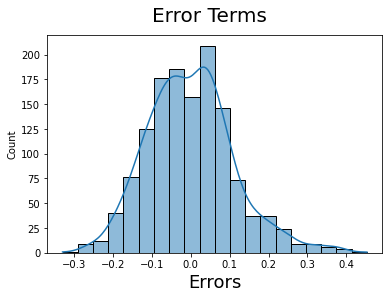

In [23]:
import seaborn as sns
y_train_price = lr_3.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20,kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Makinng Prediction Using the Final Model
We have fitted the model and
checked the normality of error
terms. Let’s make predictions using
the final model

In [24]:
df_test = pd.read_csv('Test_data.csv')
df_test

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712.40366,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298.75010,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397.77069,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044.38295,NaN


In [25]:
df_test['Previous CTC'] = [float(str(i).replace(",", "")) for i in df_test['Previous CTC']]
df_test['Previous job changes'] = [float(str(i).replace(",", "")) for i in df_test['Previous job changes']]
df_test['Graduation marks'] = [float(str(i).replace(",", "")) for i in df_test['Graduation marks']]
df_test['Exp (Months)'] =[float(str(i).replace(",", "")) for i in df_test['Exp (Months)'] ]
df_test['Actual CTC'] = [float(str(i).replace(",", "")) for i in df_test['Actual CTC']]

df_test.drop(['College_T1','College_T2','Role_Manager','City_Metro'],axis = 1,inplace=True)

df_test

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,55523.0,3.0,66.0,19.0,71406.57653,NaN
1,Tier 2,Executive,Metro,57081.0,1.0,84.0,18.0,68005.87063,NaN
2,Tier 2,Executive,Metro,60347.0,2.0,52.0,28.0,76764.02028,NaN
3,Tier 3,Executive,Metro,49010.0,2.0,81.0,33.0,82092.38688,NaN
4,Tier 3,Executive,Metro,57879.0,4.0,74.0,32.0,73878.09773,NaN
...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4.0,68.0,50.0,69712.40366,NaN
1334,Tier 1,Executive,Non-Metro,53714.0,1.0,67.0,18.0,69298.75010,NaN
1335,Tier 2,Executive,Non-Metro,61957.0,1.0,47.0,18.0,66397.77069,NaN
1336,Tier 1,Executive,Non-Metro,53203.0,3.0,69.0,21.0,64044.38295,NaN


In [26]:
college_type = pd.get_dummies(df_test['College'],drop_first=True)
role_type = pd.get_dummies(df_test['Role'],drop_first=True)
city_type = pd.get_dummies(df_test['City type'],drop_first=True)

df_test = pd.concat([df_test,college_type,role_type,city_type],axis=1)

df_test

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Predicted CTC,Tier 2,Tier 3,Manager,Non-Metro
0,Tier 1,Manager,Non-Metro,55523.0,3.0,66.0,19.0,71406.57653,NaN,0,0,1,1
1,Tier 2,Executive,Metro,57081.0,1.0,84.0,18.0,68005.87063,NaN,1,0,0,0
2,Tier 2,Executive,Metro,60347.0,2.0,52.0,28.0,76764.02028,NaN,1,0,0,0
3,Tier 3,Executive,Metro,49010.0,2.0,81.0,33.0,82092.38688,NaN,0,1,0,0
4,Tier 3,Executive,Metro,57879.0,4.0,74.0,32.0,73878.09773,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661.0,4.0,68.0,50.0,69712.40366,NaN,0,1,0,0
1334,Tier 1,Executive,Non-Metro,53714.0,1.0,67.0,18.0,69298.75010,NaN,0,0,0,1
1335,Tier 2,Executive,Non-Metro,61957.0,1.0,47.0,18.0,66397.77069,NaN,1,0,0,1
1336,Tier 1,Executive,Non-Metro,53203.0,3.0,69.0,21.0,64044.38295,NaN,0,0,0,1


In [27]:
df_test.drop(['College','Role','City type','Predicted CTC'],axis=1,inplace=True)
df_test

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Tier 2,Tier 3,Manager,Non-Metro
0,55523.0,3.0,66.0,19.0,71406.57653,0,0,1,1
1,57081.0,1.0,84.0,18.0,68005.87063,1,0,0,0
2,60347.0,2.0,52.0,28.0,76764.02028,1,0,0,0
3,49010.0,2.0,81.0,33.0,82092.38688,0,1,0,0
4,57879.0,4.0,74.0,32.0,73878.09773,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661.0,4.0,68.0,50.0,69712.40366,0,1,0,0
1334,53714.0,1.0,67.0,18.0,69298.75010,0,0,0,1
1335,61957.0,1.0,47.0,18.0,66397.77069,1,0,0,1
1336,53203.0,3.0,69.0,21.0,64044.38295,0,0,0,1


In [28]:
num_vars_test = ['Previous CTC','Previous job changes','Graduation marks','Exp (Months)','Actual CTC']
df_test[num_vars_test] = scaler.fit_transform(df_test[num_vars_test])

df_test

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Tier 2,Tier 3,Manager,Non-Metro
0,0.452897,0.666667,0.62,0.021739,0.261181,0,0,1,1
1,0.490970,0.000000,0.98,0.000000,0.212873,1,0,0,0
2,0.570783,0.333333,0.34,0.217391,0.337284,1,0,0,0
3,0.293737,0.333333,0.92,0.326087,0.412975,0,1,0,0
4,0.510471,1.000000,0.78,0.304348,0.296289,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.554019,1.000000,0.66,0.695652,0.237115,0,1,0,0
1334,0.408690,0.000000,0.64,0.000000,0.231239,0,0,0,1
1335,0.610127,0.000000,0.24,0.000000,0.190030,1,0,0,1
1336,0.396202,0.666667,0.68,0.065217,0.156599,0,0,0,1


In [29]:
actual_ctc = df_test['Actual CTC']
actual_ctc

0       0.261181
1       0.212873
2       0.337284
3       0.412975
4       0.296289
          ...   
1333    0.237115
1334    0.231239
1335    0.190030
1336    0.156599
1337    0.430784
Name: Actual CTC, Length: 1338, dtype: float64

In [30]:
y_test = df_test.pop('Actual CTC')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m3 = X_test_m3.drop(['Previous job changes','Graduation marks'], axis = 1)

# Making predictions using the final model
y_pred_m3 = lr_3.predict(X_test_m3)


Now, we have to see if the final
predicted model is best fitted or not.
To do that, we’ll calculate the R²
value for the expected test model.

In [31]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m3)


0.608161875711124

The R² value for the test `data = 0.608161875711124`,
The R² value for the train `data = 0.608` ; we can see the value from the
final model summary above.
**Since the R² values for both the
train and test data are almost equal,
the model we built is the best-fitted
model.**

In [32]:
y_pred_m3

0       0.470693
1       0.181929
2       0.239700
3       0.197268
4       0.250521
          ...   
1333    0.328209
1334    0.180393
1335    0.155291
1336    0.188154
1337    0.535429
Length: 1338, dtype: float64

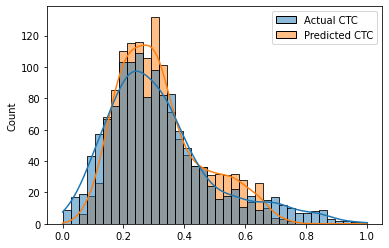

In [33]:
frame = {'Actual CTC': actual_ctc, 'Predicted CTC': y_pred_m3}
df = pd.DataFrame(frame)

sns.histplot(df,kde=True);



This graph Showing relation between Actual CTC and Predicted CTC